# Unidad 3: Modelos no supervisados

In [4]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


# Análisis de componentes principales


In [5]:
x = np.array([[0.9, 1],
              [2.4, 2.6],
              [1.2, 1.7],
              [0.5, 0.7],
              [0.3, 0.7],
              [1.8, 1.4],
              [0.5, 0.6],
              [0.3, 0.6],
              [2.5, 2.6],
              [1.3, 1.1]])
print("dimension:%s ::: Media de Caracteria_1: %.2f <=> Media de Caracteria_2: %.2f " %( str(x.shape), (mean(x.T[0])) , ( mean(x.T[1]) ) ) )
y = np.array([x.T[0] - mean(x.T[0]),
              x.T[1] - mean(x.T[1])])

print(y)
print(y.T)

c = np.cov(y)

l, v = np.linalg.eig(c) ## Obtiene los arreglos de valores y vectores propios

print("Los vectores propios son: ", v[0], "y", v[1])
print("Los valores propios son: ", l)

#dot :: #Realiza el producto escalar de dos vectores
print("Primer componente: ", dot(y.T, v.T[0])) 
print("Segundo componente: ", -dot(y.T, v.T[1]))

dimension:(10, 2) ::: Media de Caracteria_1: 1.17 <=> Media de Caracteria_2: 1.30 
[[-0.27  1.23  0.03 -0.67 -0.87  0.63 -0.67 -0.87  1.33  0.13]
 [-0.3   1.3   0.4  -0.6  -0.6   0.1  -0.7  -0.7   1.3  -0.2 ]]
[[-0.27 -0.3 ]
 [ 1.23  1.3 ]
 [ 0.03  0.4 ]
 [-0.67 -0.6 ]
 [-0.87 -0.6 ]
 [ 0.63  0.1 ]
 [-0.67 -0.7 ]
 [-0.87 -0.7 ]
 [ 1.33  1.3 ]
 [ 0.13 -0.2 ]]
Los vectores propios son:  [ 0.73251454 -0.68075138] y [0.68075138 0.73251454]
Los valores propios son:  [1.25057433 0.03398123]
Primer componente:  [-0.40200434  1.78596968  0.29427599 -0.89923557 -1.04573848  0.5295593
 -0.96731071 -1.11381362  1.85922114 -0.04092339]
Segundo componente:  [ 0.03595149 -0.1149447  -0.27258328 -0.0165947  -0.15274498  0.35562192
  0.05665675 -0.07949352 -0.04686956  0.23500059]


**Utilizando `sklearn` solo usamos fit_transform**

In [6]:
from sklearn.decomposition import PCA

#print(x)
pca = PCA(n_components=2)   #porque tenemos  2 variables
print(pca)
x_pca = pca.fit_transform(x)  #Proyectamos o Generamos valores en relacion al arreglo X que tiene 2 caracteristicas
print(x_pca.shape)
print(x_pca)

####Varianza:: pretende capturar en qué medida los datos están en torno a la media. 
####           Si tenemos datos muy por encima y muy por debajo de la media, esta será menos representativa y lo veremos reflejado en una elevada varianza
####El ratio de variancia debe sumar 1
print("Varianza explicada con la primera componentes:", pca.explained_variance_ratio_[0])  ##Con solo la 1era componente se puede explicar el 97% de la dispersion y por eso el 2do componente no se tomaria en cuenta  
                                                                                           ##Con esto podriamos reducir la dimensionalidad de 2 a 1
print("Varianza explicada con la segunda componentes:", pca.explained_variance_ratio_[1])

##print("Varianza explicada con la primera componentes:", pca.explained_variance_ratio_[0])
##print("Varianza explicada con la segunda componentes:", pca.explained_variance_ratio_[1])

PCA(n_components=2)
(10, 2)
[[-0.40200434  0.03595149]
 [ 1.78596968 -0.1149447 ]
 [ 0.29427599 -0.27258328]
 [-0.89923557 -0.0165947 ]
 [-1.04573848 -0.15274498]
 [ 0.5295593   0.35562192]
 [-0.96731071  0.05665675]
 [-1.11381362 -0.07949352]
 [ 1.85922114 -0.04686956]
 [-0.04092339  0.23500059]]
Varianza explicada con la primera componentes: 0.9735463162870779
Varianza explicada con la segunda componentes: 0.026453683712922105


In [ ]:
####Varianza:: pretende capturar en qué medida los datos están en torno a la media. 
####           Si tenemos datos muy por encima y muy por debajo de la media, esta será menos representativa y lo veremos reflejado en una elevada varianza
####El ratio de variancia debe sumar 1
##print("Varianza explicada con la primera componentes:", pca.explained_variance_ratio_[0])  ##Con solo la 1era componente se puede explicar el 97% de la dispersion y por eso el 2do componente no se tomaria en cuenta  
##print("Varianza explicada con la segunda componentes:", pca.explained_variance_ratio_[1])

In [22]:
from sklearn import datasets
import seaborn as sns  # to plot the heat maps
import pandas as pd  # to load the dataframe


array_iris = datasets.load_iris()
print(type(array_iris))
#print(array_iris)



iris_names  = datasets.load_iris().target_names
print("Y Clase Descripcion :: %s" %(str(iris_names))) 

iris_target = datasets.load_iris().target
print("Y Clase Value :: %s" %(str(iris_target)))

iris_values = datasets.load_iris().data
print(iris_values.shape)
print("X Caracteristicas Descripcion: sepal length in cm, sepal width in cm, petal length in cm, petal width in cm")
print("X Caracteristicas Value :: %s" %(str(iris_values[-10:]))) ###ultimos 10



<class 'sklearn.utils.Bunch'>
Y Clase Descripcion :: ['setosa' 'versicolor' 'virginica']
Y Clase Value :: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150, 4)
X Caracteristicas Descripcion: sepal length in cm, sepal width in cm, petal length in cm, petal width in cm
X Caracteristicas Value :: [[6.7 3.1 5.6 2.4]
 [6.9 3.1 5.1 2.3]
 [5.8 2.7 5.1 1.9]
 [6.8 3.2 5.9 2.3]
 [6.7 3.3 5.7 2.5]
 [6.7 3.  5.2 2.3]
 [6.3 2.5 5.  1.9]
 [6.5 3.  5.2 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]]


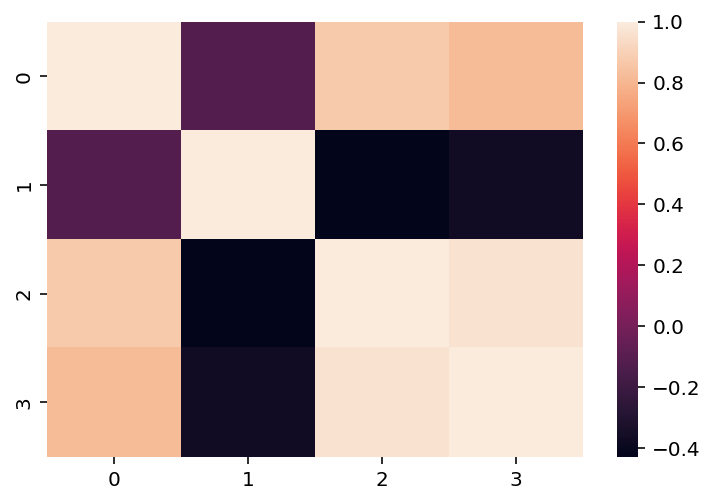

In [25]:
from sklearn.preprocessing import StandardScaler
#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
df_iris_new = pd.DataFrame(array_iris.data, columns = array_iris.feature_names)
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(df_iris_new)) #scaling the data
scaled_data

#Check the Co-relation between features without PCA
sns.heatmap(scaled_data.corr())  #sepal length & petal length and petal length & petal width have high co-relation .. Por lo tanto, evidentemente necesitamos aplicar la reducción de dimensionalidad

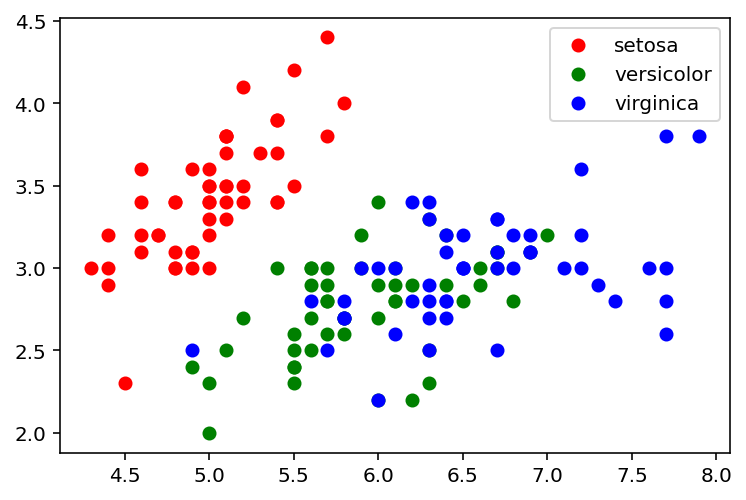

In [8]:

##Eje X: sepal length in cm
##Eje Y: sepal width in cm
#scatter(Caracteristica sepal length de cada clase)
scatter(iris_values[iris_target == 0, 0], iris_values[iris_target == 0, 1], c='r')  #Representamos la clase_y de "setosa" con los valores de  sepal length y sepal width
scatter(iris_values[iris_target == 1, 0], iris_values[iris_target == 1, 1], c='g')  #Representamos la clase_y de "versicolor" con los valores de  sepal length y sepal width
scatter(iris_values[iris_target == 2, 0], iris_values[iris_target == 2, 1], c='b')  #Representamos la clase_y de "verginica" con los valores de  sepal length y sepal width
legend(iris_names)





In [27]:
pca      = PCA(n_components = None)
print(pca)
iris_pca = pca.fit_transform(iris_values) ## Proyectamos o generamos los planes|ejes de los componentes principales en base a las Caracterisicas "sepal length, sepal width, petal length, petal width"
print(iris_pca[-10:])
cantidad_caracteristicas = shape(iris_pca)[1]
print(cantidad_caracteristicas)

for i in range(cantidad_caracteristicas):
    explained_var = pca.explained_variance_ratio_[range(i + 1)]
    print("Varianza explicada en arreglo de ", i + 1, "componentes:", explained_var)

    explained_var_acum = pca.explained_variance_ratio_[range(i + 1)].sum()
    print("Varianza Acumulada|explicada con", i + 1, "componentes:", explained_var_acum)

    print("\n")




PCA()
[[ 2.31415471  0.18365128  0.32269375 -0.27765378]
 [ 1.9222678   0.40920347  0.1135866  -0.50530497]
 [ 1.41523588 -0.57491635  0.29632253  0.01530467]
 [ 2.56301338  0.2778626   0.29256952 -0.05791275]
 [ 2.41874618  0.3047982   0.50448266 -0.241091  ]
 [ 1.94410979  0.1875323   0.17782509 -0.42619594]
 [ 1.52716661 -0.37531698 -0.12189817 -0.25436744]
 [ 1.76434572  0.07885885  0.13048163 -0.13700127]
 [ 1.90094161  0.11662796  0.72325156 -0.0445953 ]
 [ 1.39018886 -0.28266094  0.36290965  0.15503863]]
4
Varianza explicada en arreglo de  1 componentes: [0.92461872]
Varianza Acumulada|explicada con 1 componentes: 0.9246187232017271


Varianza explicada en arreglo de  2 componentes: [0.92461872 0.05306648]
Varianza Acumulada|explicada con 2 componentes: 0.977685206318795


Varianza explicada en arreglo de  3 componentes: [0.92461872 0.05306648 0.01710261]
Varianza Acumulada|explicada con 3 componentes: 0.9947878161267247


Varianza explicada en arreglo de  4 componentes: [0.9246

In [28]:
print(type(iris_pca))
print(iris_pca.shape)
print(iris_pca[-10:]) ##ultimos 10

<class 'numpy.ndarray'>
(150, 4)
[[ 2.31415471  0.18365128  0.32269375 -0.27765378]
 [ 1.9222678   0.40920347  0.1135866  -0.50530497]
 [ 1.41523588 -0.57491635  0.29632253  0.01530467]
 [ 2.56301338  0.2778626   0.29256952 -0.05791275]
 [ 2.41874618  0.3047982   0.50448266 -0.241091  ]
 [ 1.94410979  0.1875323   0.17782509 -0.42619594]
 [ 1.52716661 -0.37531698 -0.12189817 -0.25436744]
 [ 1.76434572  0.07885885  0.13048163 -0.13700127]
 [ 1.90094161  0.11662796  0.72325156 -0.0445953 ]
 [ 1.39018886 -0.28266094  0.36290965  0.15503863]]


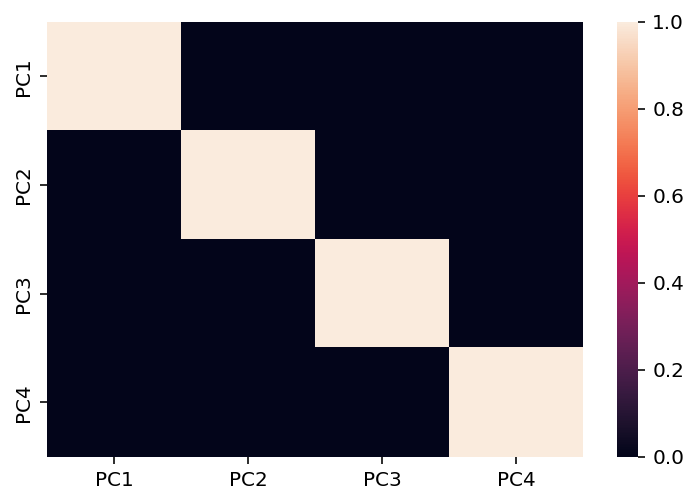

In [31]:
#Checking Co-relation between features after PCA
#print(iris_pca)
sns.heatmap(pd.DataFrame(iris_pca,columns=['PC1','PC2','PC3', 'PC4']).corr())

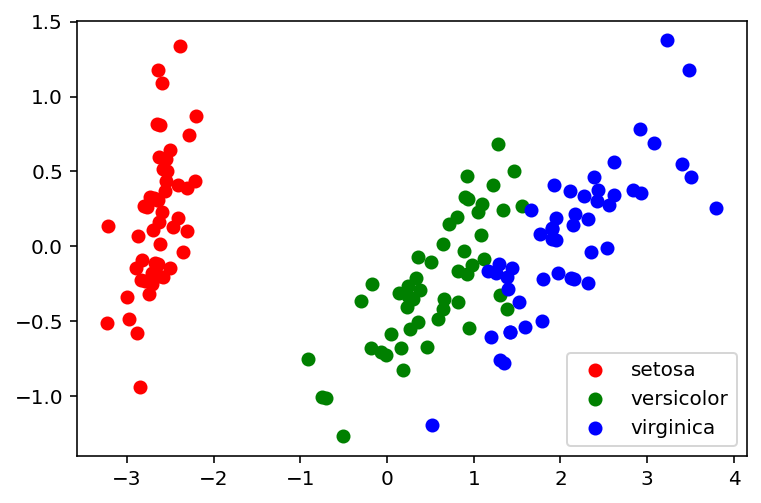

In [ ]:
################################################################################################################################################
#reducir el conjunto de datos de trabajo inicial a un conjunto de datos de dos dimensiones que aún así conserva la información más esencial
#de forma que nos resultará mucho más sencillo el trabajo de crear un modelo predictivo a partir de estos datos
###############################################################################################################################################
scatter(iris_pca[iris_target == 0, 0], iris_pca[iris_target == 0, 1], c='r')  #Representamos la clase_y de "setosa" con los valores de los 2 1eros componentes principales [ suman 97.8% ]
scatter(iris_pca[iris_target == 1, 0], iris_pca[iris_target == 1, 1], c='g')  #Representamos la clase_y de "versicolor" con los valores de los 2 1eros componentes principales [ suman 97.8% ]
scatter(iris_pca[iris_target == 2, 0], iris_pca[iris_target == 2, 1], c='b')  #Representamos la clase_y de "virginica" con los valores de los 2 1eros componentes principales [ suman 97.8% ]
legend(iris_names)

print("Con esto podriamos reducir la dimensionalidad de 4 a 2(elegimos sepal length, sepal width)")

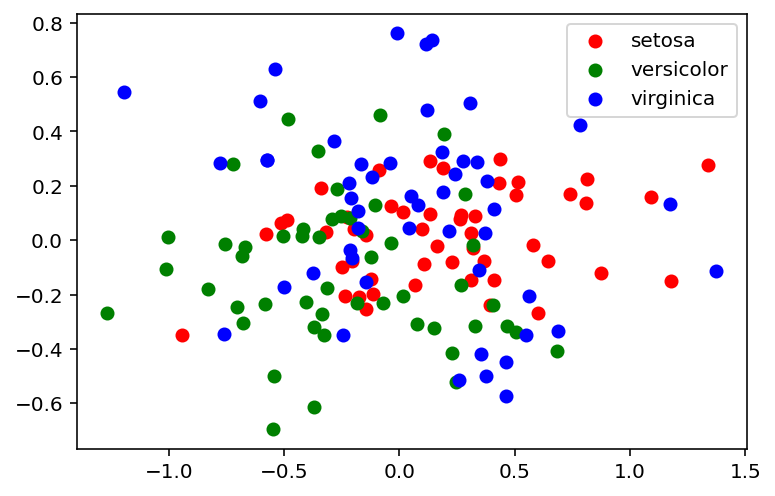

In [ ]:
scatter(iris_pca[iris_target == 0, 1], iris_pca[iris_target == 0, 2], c='r')  #Representamos la clase_y de "setosa" con los valores del 2do componente principal y el 3er componente principal [ suman 7% ]
scatter(iris_pca[iris_target == 1, 1], iris_pca[iris_target == 1, 2], c='g')  #Representamos la clase_y de "versicolor" con los valores del 2do componente principal y el 3er componente principal [ suman 7% ]
scatter(iris_pca[iris_target == 2, 1], iris_pca[iris_target == 2, 2], c='b')  #Representamos la clase_y de "virginica" con los valores del 2do componente principal y el 3er componente principal [ suman 7% ]
legend(iris_names)

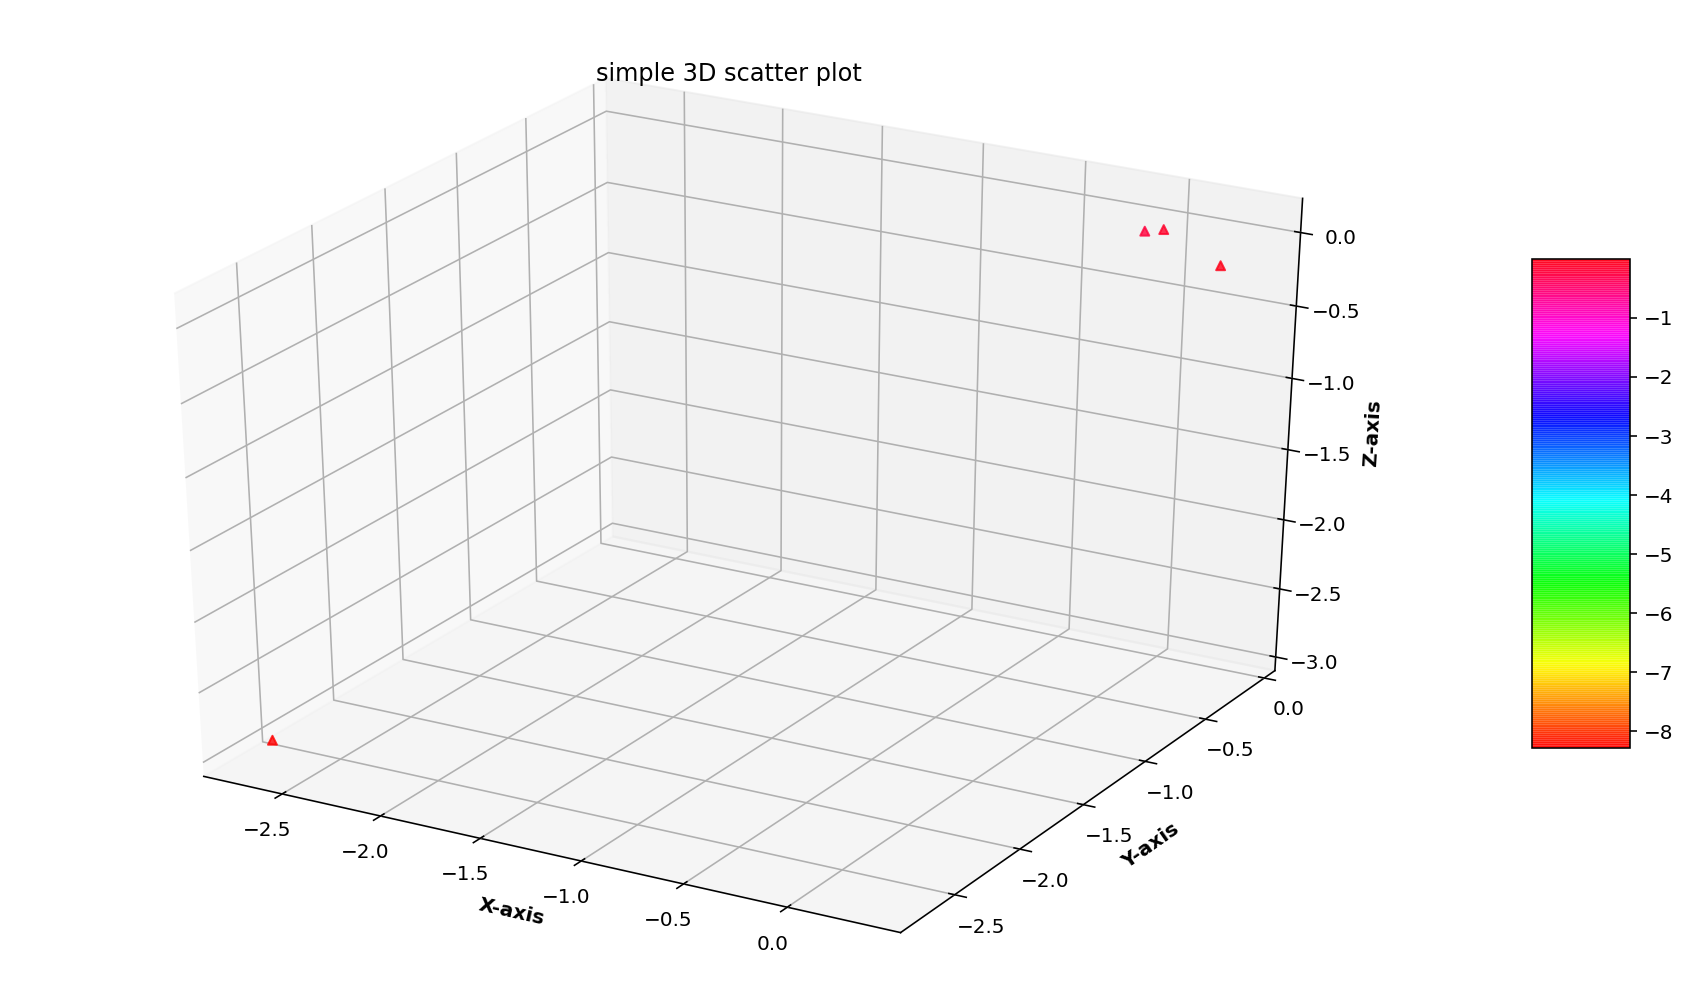

In [ ]:
#############################################
###Con los 3 primeros componentes Principales
##############################################

# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


# Creating dataset  ###En ningun orden sale la grafica bien
z = iris_pca[2]
x = iris_pca[0]
y = iris_pca[1]

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.3,
		alpha = 0.2)


# Creating color map
my_cmap = plt.get_cmap('hsv')

# Creating plot
sctt = ax.scatter3D(x, y, z,
					alpha = 0.8,
					c = (x + y + z),
					cmap = my_cmap,
					marker ='^')

plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

# show plot
plt.show()


# Identificación de objetos similares con k-means
## Midiendo la similitud entre dos registros

In [ ]:
from scipy.spatial.distance import cdist

print(cdist([[0, 1]], [[1, 2]], 'euclidean'))
print(cdist([[0, 1]], [[1, 2]], 'minkowski', p = 3))
print(cdist([[0, 1]], [[1, 2]], 'cityblock'))
print(cdist([[0, 1]], [[1, 2]], 'cosine'))
print(cdist([[0, 1]], [[1, 2]], 'correlation'))
print(cdist([[0, 1]], [[1, 2]], 'seuclidean', V =[0.25, 0.5]))

[[1.41421356]]
[[1.25992105]]
[[2.]]
[[0.10557281]]
[[2.22044605e-16]]
[[2.44948974]]


## Algoritmo de k-means

In [ ]:
from sklearn.datasets import make_blobs   #Permite Generar un dataset de manchas gausianas

blobs_3, classes_3 = make_blobs(300                   #total number of point
                                ,centers      = 3     #The number of centers to generate, or the fixed center locations
                                , cluster_std  = 0.5  #The standard deviation of the clusters
                                , random_state = 1
                              )
print(type(classes_3))
print(classes_3.shape)
print("Tipos:{0} {1} <=> blobs_3:{2} <=> classes_3:{3}".format( str(type(blobs_3)), str(type(classes_3)), str(blobs_3.shape), str(classes_3.shape)  ))

print("X Caracteristicas-blobs_3 :: %s" %(str(blobs_3[-10:])))
print("X Caracteristicas-classes_3 :: %s" %(str(classes_3[-10:])))
print("\n")
blobs_5, classes_5 = make_blobs(300, centers = 5, cluster_std  = 0.5, random_state = 1)
print("Tipos:{0} {1} <=> blobs_5:{2} <=> classes_5:{3}".format( str(type(blobs_5)), str(type(classes_5)), str(blobs_5.shape), str(classes_5.shape)  ))
print("X Caracteristicas-blobs_5 :: %s" %(str(blobs_5[-10:])))
print("X Caracteristicas-classes_5 :: %s" %(str(classes_5[-10:])))

<class 'numpy.ndarray'>
(300,)
Tipos:<class 'numpy.ndarray'> <class 'numpy.ndarray'> <=> blobs_3:(300, 2) <=> classes_3:(300,)
X Caracteristicas-blobs_3 :: [[ -9.57136047  -3.9356685 ]
 [-10.93429299  -3.49304099]
 [ -1.25862939   4.42977352]
 [-10.13726136  -3.141924  ]
 [ -9.27199787  -4.26236697]
 [ -0.84573453   4.57549572]
 [-10.58887157  -4.28622581]
 [ -6.54238498  -7.84897076]
 [ -7.36546058  -7.87519135]
 [ -7.15369828  -8.90845629]]
X Caracteristicas-classes_3 :: [1 1 0 1 1 0 1 2 2 2]


Tipos:<class 'numpy.ndarray'> <class 'numpy.ndarray'> <=> blobs_5:(300, 2) <=> classes_5:(300,)
X Caracteristicas-blobs_5 :: [[ -1.55904698   0.03805335]
 [ -6.33916755  -8.46224653]
 [ -2.92434775   0.80489518]
 [ -2.17585753   1.51141485]
 [ -5.96580301  -3.18087362]
 [ -6.92806281  -3.05059522]
 [ -9.56326943  -3.57814273]
 [ -6.75398043  -8.45313037]
 [ -8.31810251  -9.21031007]
 [-10.08817265  -4.25530886]]
X Caracteristicas-classes_5 :: [4 2 4 4 3 3 1 2 2 1]


[[ -1.5563583    4.40702977]
 [ -7.05513029  -8.06474962]
 [-10.04025348  -3.92434426]]




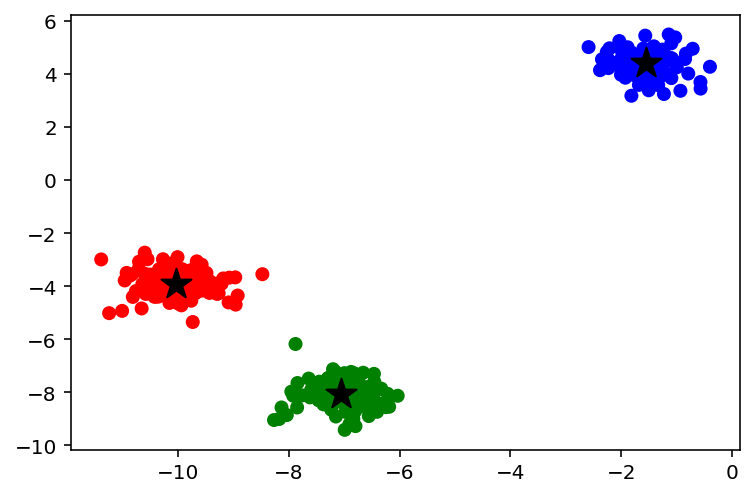

In [ ]:
from sklearn.cluster import KMeans

color_map = array(['b','g','r','c','m','y','k'])

kmeans = KMeans(n_clusters = 3,
                random_state = 1).fit(blobs_3)
classes_3_pred_3 = kmeans.predict(blobs_3)

scatter(blobs_3[:, 0], blobs_3[:, 1],
        color = color_map[classes_3_pred_3])

print(kmeans.cluster_centers_)
print("\n")
scatter(kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        marker = '*',
        s = 250,
        color = 'black')

[[-8.10074185 -3.47103993]
 [-1.85191929  2.64383063]
 [-7.0618469  -8.14191437]]




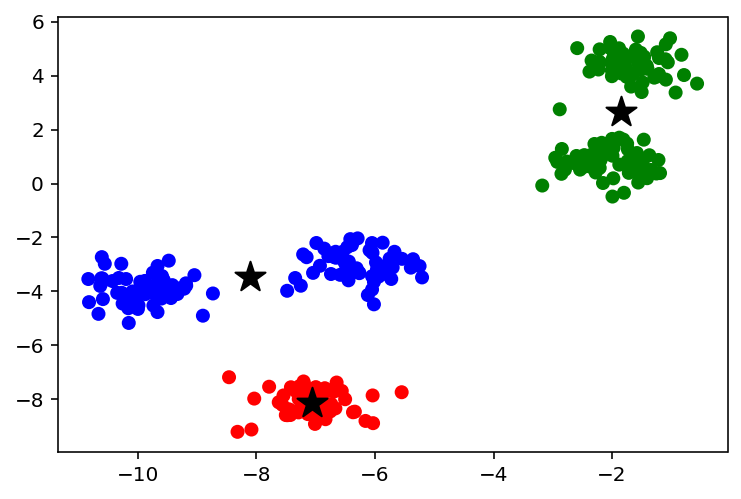

In [ ]:
kmeans = KMeans(n_clusters = 3,
                random_state = 1).fit(blobs_5)
classes_5_pred_3 = kmeans.predict(blobs_5)

scatter(blobs_5[:, 0], blobs_5[:, 1],
        color = color_map[classes_5_pred_3])

print(kmeans.cluster_centers_)
print("\n")

scatter(kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        marker = '*',
        s = 250,
        color = 'black')

[[ -6.91551776  -8.53450847]
 [ -1.5563583    4.40702977]
 [ -9.88314688  -4.20750563]
 [ -7.17405948  -7.66458467]
 [-10.31955411  -3.42094627]]




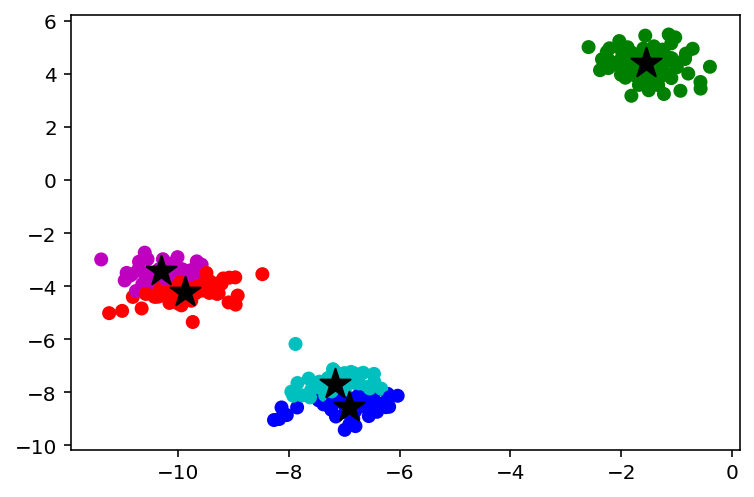

In [ ]:
kmeans = KMeans(n_clusters = 5,
                random_state = 1).fit(blobs_3)
classes_3_pred_5 = kmeans.predict(blobs_3)

scatter(blobs_3[:, 0], blobs_3[:, 1],
        color = color_map[classes_3_pred_5])

print(kmeans.cluster_centers_)
print("\n")


scatter(kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        marker = '*',
        s = 250,
        color = 'black')

[[-6.28659912 -3.00822311]
 [-2.08225119  0.85125056]
 [-7.0618469  -8.14191437]
 [-9.91488459 -3.93385676]
 [-1.6215874   4.4364107 ]]




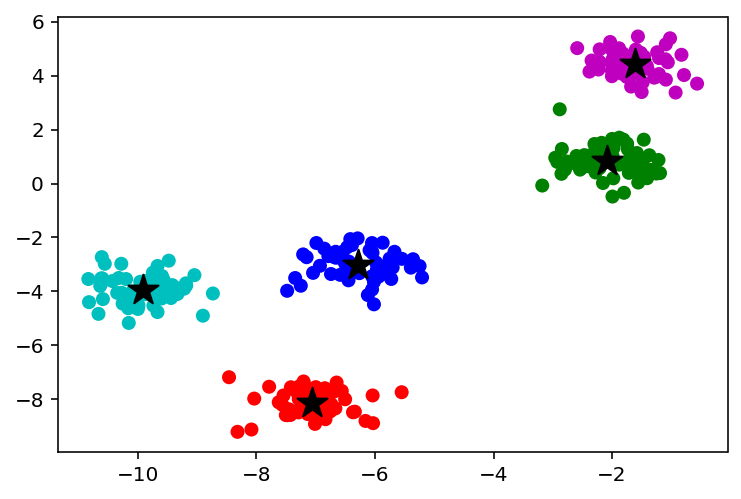

In [ ]:
kmeans = KMeans(n_clusters = 5,
                random_state = 1).fit(blobs_5)
classes_5_pred_5 = kmeans.predict(blobs_5)

scatter(blobs_5[:, 0], blobs_5[:, 1],
        color = color_map[classes_5_pred_5])

print(kmeans.cluster_centers_)
print("\n")

scatter(kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        marker = '*',
        s = 250,
        color = 'black')

## Identificación del número de clúster en un conjunto de dato

In [ ]:
###n_init :: Número de veces que se ejecutará el algoritmo k-means con semillas de centroide diferentes. 
###          Los resultados finales serán la mejor salida de n_init ejecuciones consecutivas en términos de inercia

def fun_plot_dispersion(x, figure_name, max_k = 10, n_init = 10):
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        inertia.append(kmeans.inertia_)

    plot(range(1, max_k), inertia, 'bx-')
    xlabel('k')
    ylabel(u'Dispersión')
    title(figure_name)

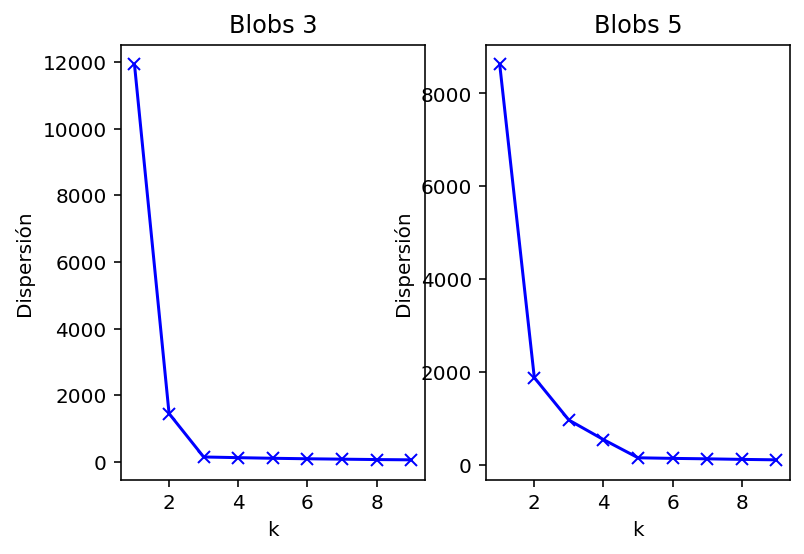

In [ ]:
subplot(1, 2, 1)
fun_plot_dispersion(blobs_3, 'Blobs 3')   #Estabilizacion en k = 3
subplot(1, 2, 2)
fun_plot_dispersion(blobs_5, 'Blobs 5')   #Estabilizacion en k = 5

In [ ]:
from sklearn.metrics import silhouette_score
## El método de la distorsión no ofrece resultados porque los clústeres no se encuentran tan claramente separados como en el ejemplo
## El coeficiente silhouette se define como la diferencia entre la distancia media a los elementos del clúster más cercano (b) 
## y a la distancia intraclúster media de los elementos de un clúster (a) dividida entre el máximo de los dos

def plot_sillhouette(blobs, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(blobs)
        sillhouette_avgs.append(silhouette_score(blobs, kmean.labels_))
        
    plot(range(2, max_k), sillhouette_avgs)
    title(figure_name)

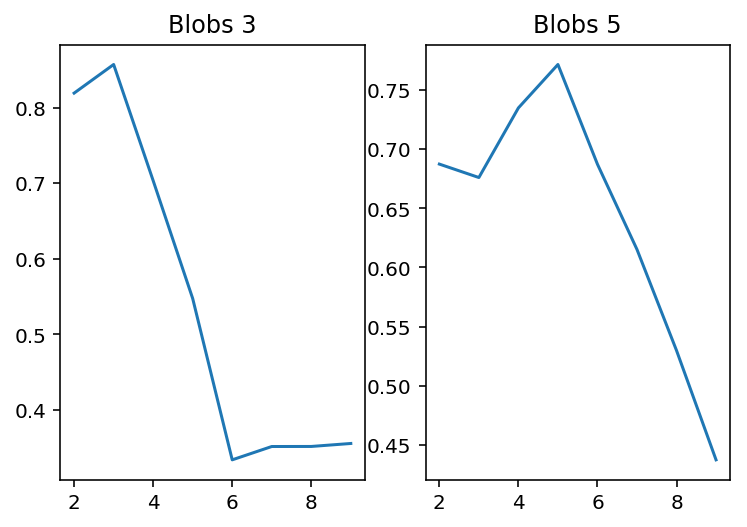

In [ ]:
subplot(1, 2, 1)
plot_sillhouette(blobs_3, 'Blobs 3')    #Caida abruptamente alrededor de 3
subplot(1, 2, 2)
plot_sillhouette(blobs_5, 'Blobs 5')    #Caida abruptamente alrededor de 5

## Organización de clústeres como árbol jerárquico

In [ ]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform

df = pd.DataFrame(blobs_3[0:5, :])
row_dist = pd.DataFrame(squareform(pdist(df, metric = 'euclidean')))
row_dist

,0,1,2,3,4
0,0.000000,6.092759,0.833313,11.845115,12.017689
1,6.092759,0.000000,6.816534,13.609028,13.798075
2,0.833313,6.816534,0.000000,11.391524,11.559173
3,11.845115,13.609028,11.391524,0.000000,0.189181
4,12.017689,13.798075,11.559173,0.189181,0.000000


In [ ]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(df, metric = 'euclidean'),
                       method = 'complete')

pd.DataFrame(row_clusters,
             columns = ['row 1', 'row 2', 'distance', 'items in cluster'],
             index = ['cluster %d' %(i) for i in range(row_clusters.shape[0])])

,row 1,row 2,distance,items in cluster
cluster 0,3.0,4.0,0.189181,2.0
cluster 1,0.0,2.0,0.833313,2.0
cluster 2,1.0,6.0,6.816534,3.0
cluster 3,5.0,7.0,13.798075,5.0


In [ ]:
from scipy.cluster.hierarchy import dendrogram

# En el momento de preparación de este notebook existía un fallo en
# Jupyter Notebook que producía un fallo después de la ejecución de
# `dendrogram`. Se ha comentado la siguiene línea para que el
# Notebook se puede ejecutar sin fallos.Al descomentar la siguiente
# línea se puede ver la gráfica.

# dendrogram(row_clusters)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = 2,
                             affinity = 'euclidean',
                             linkage = 'complete')
ac.fit_predict(df)

array([0, 0, 0, 1, 1])

In [ ]:
ac = AgglomerativeClustering(n_clusters = 2,
                             affinity = 'euclidean',
                             linkage = 'complete')
ac.fit_predict(df)

array([0, 0, 0, 1, 1])

## Localización de regiones a través de DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

km = KMeans(n_clusters = 3,
            random_state = 1).fit_predict(blobs_3)

ac = AgglomerativeClustering(n_clusters = 3, 
                             affinity = 'euclidean',
                             linkage = 'complete').fit_predict(blobs_3)

db = DBSCAN(eps = 0.6,
            min_samples = 5,
            metric = 'euclidean').fit_predict(blobs_3)

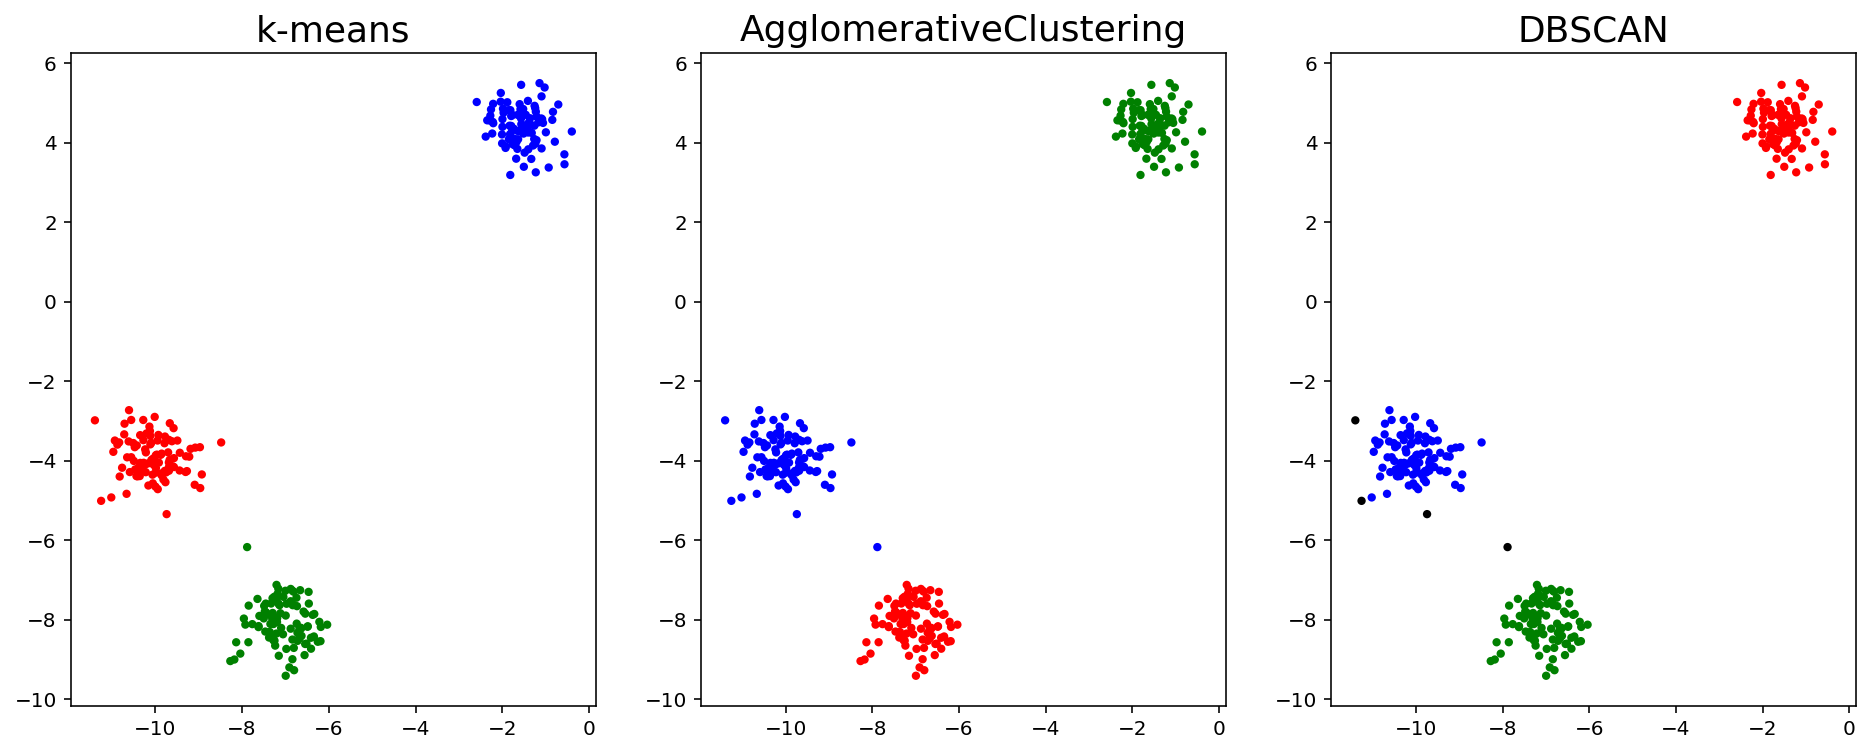

In [ ]:
figure(figsize=(16, 6))
subplot(1, 3, 1)
plt.title('k-means', size=18)
scatter(blobs_3[:, 0], blobs_3[:, 1], s=10, color = color_map[km])
subplot(1, 3, 2)
plt.title('AgglomerativeClustering', size=18)
scatter(blobs_3[:, 0], blobs_3[:, 1], s=10, color = color_map[ac])
subplot(1, 3, 3)
plt.title('DBSCAN', size=18)
scatter(blobs_3[:, 0], blobs_3[:, 1], s=10, color = color_map[db])

In [ ]:
from sklearn.datasets import make_moons

moons, moons_classes = make_moons(n_samples = 200,
                                  noise = 0.05,
                                  random_state = 1)

km = KMeans(n_clusters = 2,
            random_state = 1).fit_predict(moons)

ac = AgglomerativeClustering(n_clusters = 2, 
                             affinity = 'euclidean',
                             linkage = 'complete').fit_predict(moons)

db = DBSCAN(eps = 0.2,
            min_samples = 5,
            metric = 'euclidean').fit_predict(moons)

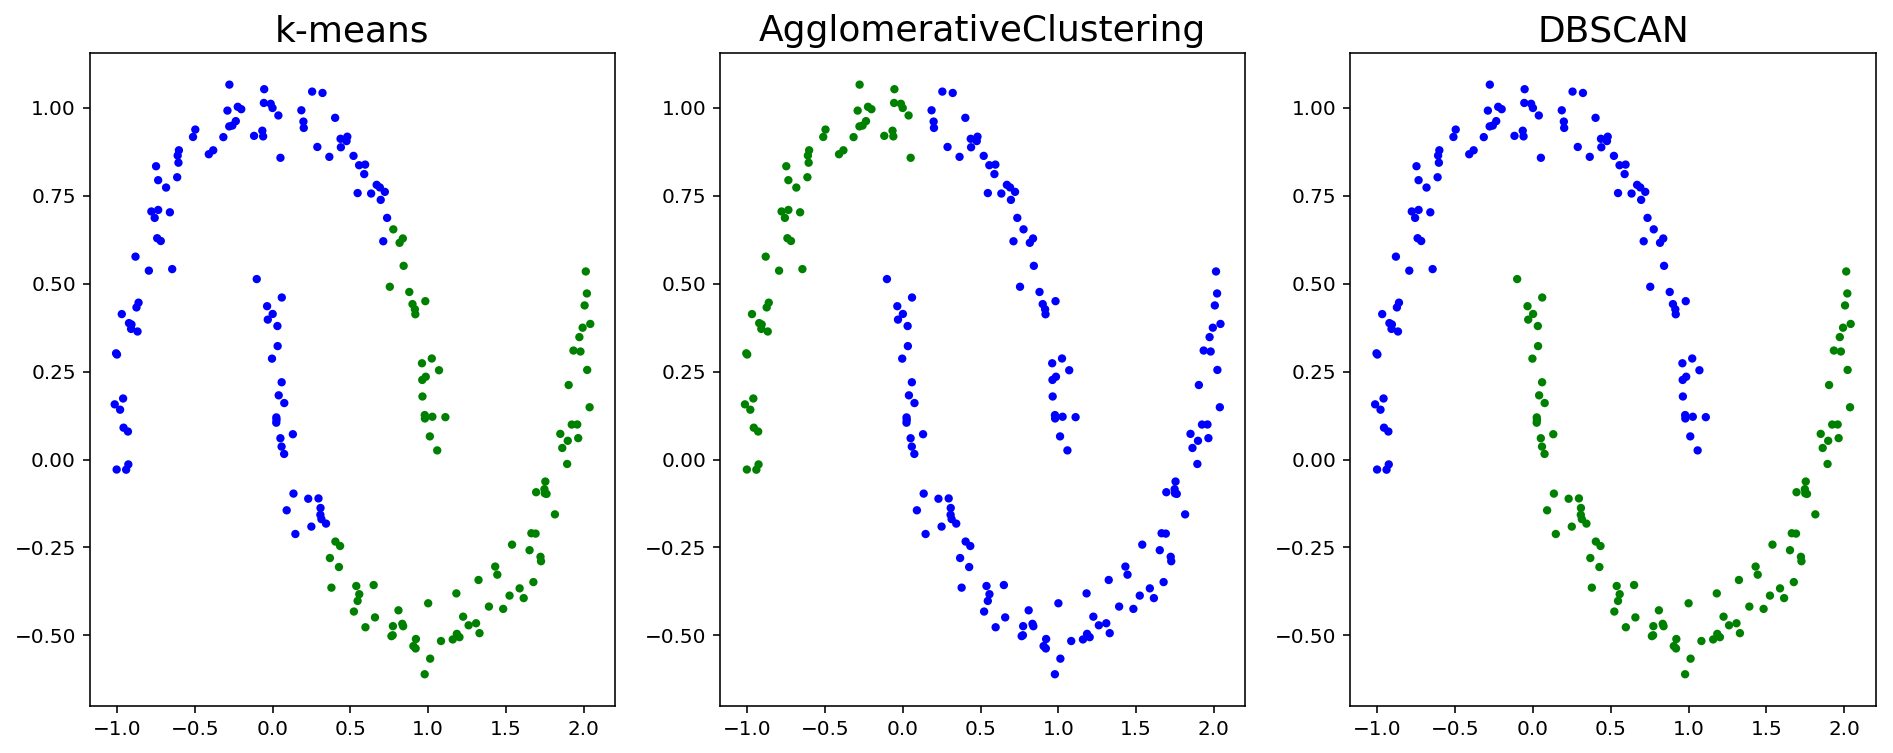

In [ ]:
figure(figsize=(16, 6))
subplot(1, 3, 1)
plt.title('k-means', size = 18)
scatter(moons[:, 0], moons[:, 1], s=10, color = color_map[km])
subplot(1, 3, 2)
plt.title('AgglomerativeClustering', size = 18)
scatter(moons[:, 0], moons[:, 1], s=10, color = color_map[ac])
subplot(1, 3, 3)
plt.title('DBSCAN', size = 18)
scatter(moons[:, 0], moons[:, 1], s=10, color = color_map[db])

# Caso práctico
Utilización el algoritmo de k-means para identificar los outliers, o valores atípicos, de un conjunto de datos aleatorio.

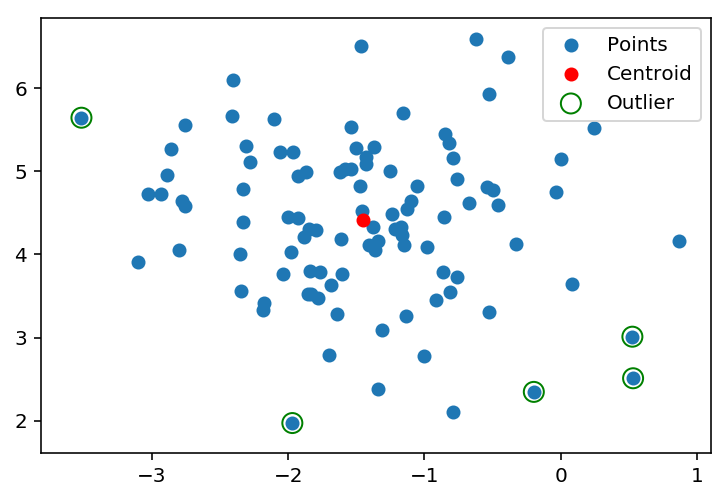

In [ ]:
X, labels  = make_blobs(100, centers = 1, random_state = 1)

kmeans     = KMeans(n_clusters = 1, random_state = 1).fit(X)
distances  = kmeans.transform(X)
sorted_idx = argsort(distances.ravel())[::-1][:5]

scatter(X[:, 0], X[:, 1],
        label = 'Points')
scatter(kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        label = 'Centroid',
        color = 'r')
scatter(X[sorted_idx][:, 0], X[sorted_idx][:, 1],
        label      = 'Outlier',
        edgecolors = 'g',
        facecolors = 'none',
        s          = 100)
legend(loc = 'best')

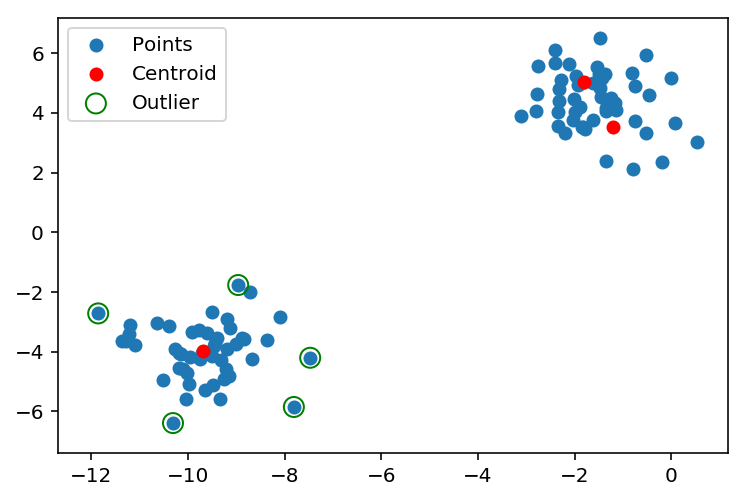

In [ ]:
X, labels  = make_blobs(100, centers = 2, random_state = 1)

kmeans     = KMeans(n_clusters = 3, random_state = 1).fit(X)
distances  = kmeans.transform(X)
sorted_idx = argsort(np.min(distances, axis=1))[::-1][:5]

scatter(X[:, 0], X[:, 1],
        label = 'Points')
scatter(kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        label = 'Centroid',
        color = 'r')
scatter(X[sorted_idx][:, 0], X[sorted_idx][:, 1],
        label      = 'Outlier',
        edgecolors = 'g',
        facecolors = 'none',
        s          = 100)
legend(loc = 'best')